# Baseline Detection

In [1]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

## Detect Basketball Court Delimitations

### 1. Convert the Image to Grayscale

In [2]:
# Constants
IMAGE_PATH = '../test_image.png'

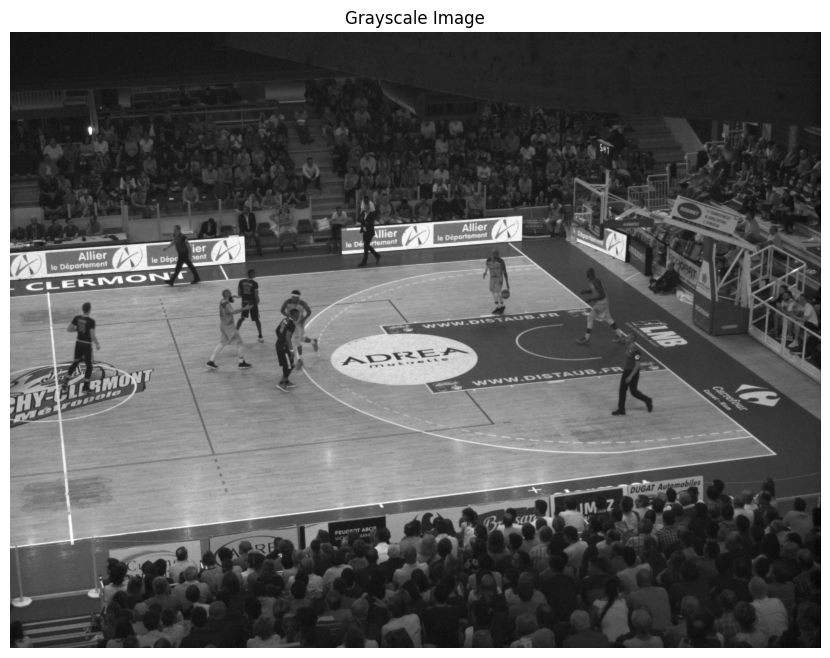

In [3]:
# Load the basketball court image
image = cv2.imread(IMAGE_PATH)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(12, 8))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

### 2. Apply Edge Detection (Canny Algorithm)

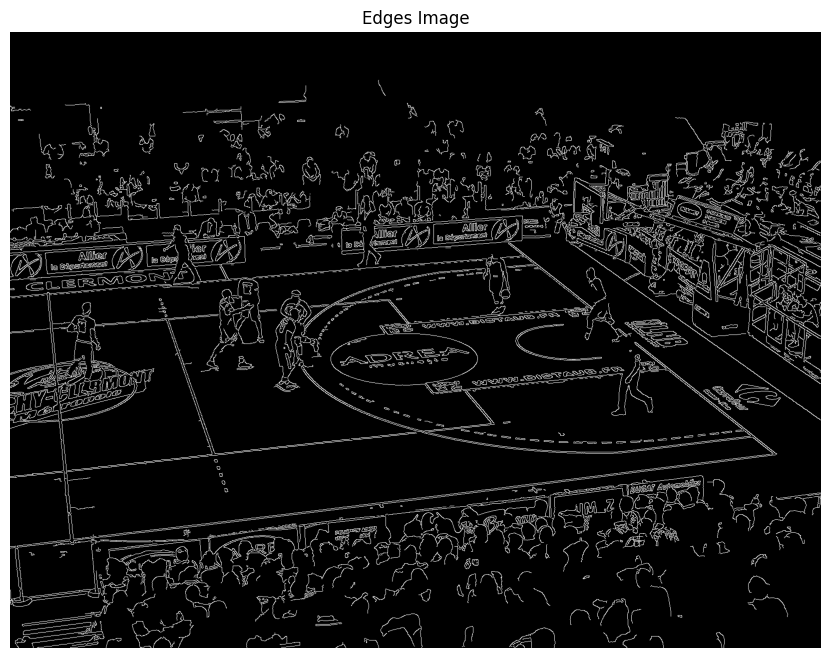

In [4]:
edges = cv2.Canny(gray, threshold1=50, threshold2=150)

edges_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(edges_rgb)
plt.axis('off')
plt.title('Edges Image')
plt.show()


### 3. Detect Court Lines Using Hough Transform

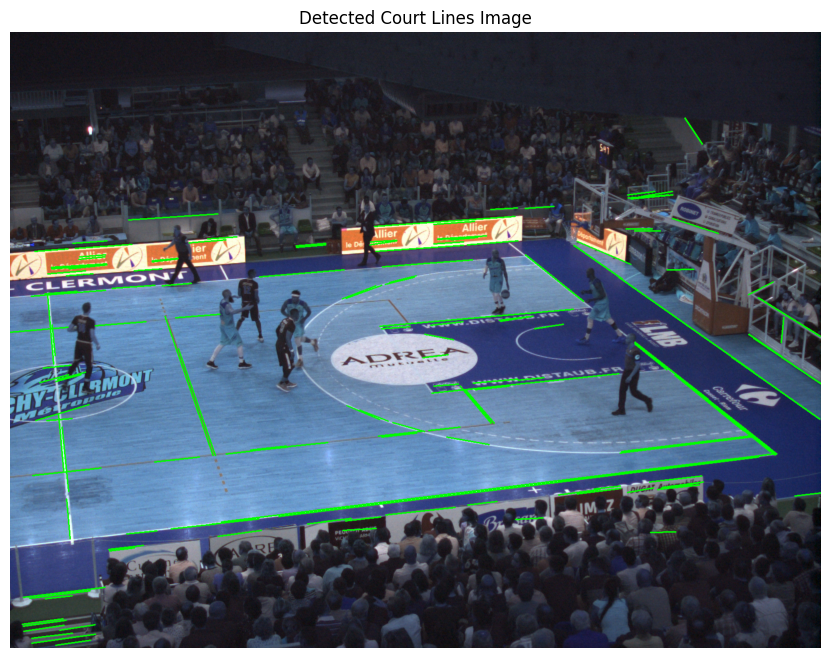

In [5]:
# Apply Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=5)

# Draw detected lines on the original image
output = image.copy()
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# Display the image with detected court lines
plt.figure(figsize=(12, 8))
plt.imshow(output)
plt.axis('off')
plt.title('Detected Court Lines Image')
plt.show()

### 4. Identify Court Delimitations

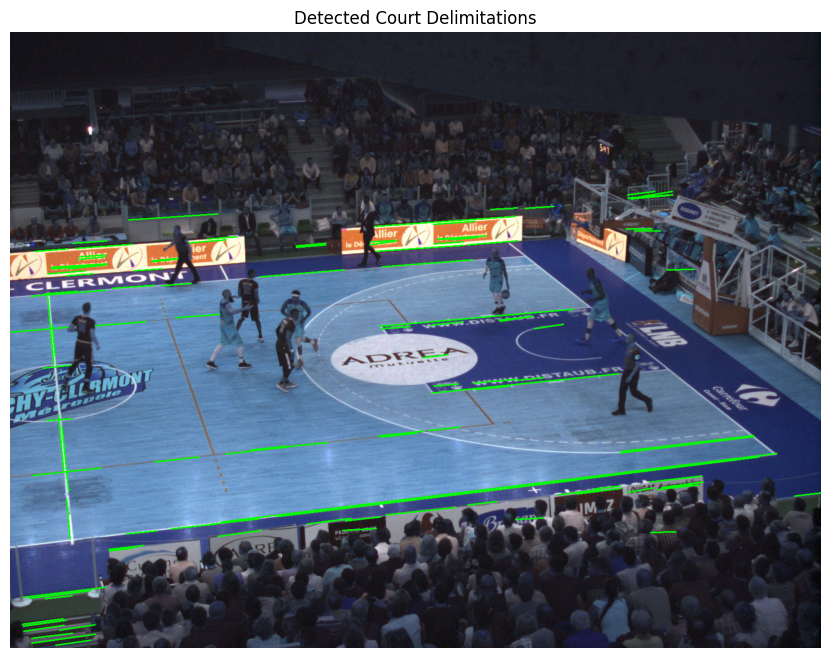

In [6]:
def filter_lines(lines, angle_threshold=10, min_length=50):
    filtered_lines = []

    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        length = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        if length > min_length and (abs(angle) < angle_threshold or abs(angle - 90) < angle_threshold):
            filtered_lines.append(line)
    return filtered_lines


def group_lines(lines, distance_threshold=20, angle_threshold=10):
    groups = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
        added = False
        for group in groups:
            gx1, gy1, gx2, gy2 = group[0][0]
            gangle = math.degrees(math.atan2(gy2 - gy1, gx2 - gx1))
            if abs(angle - gangle) < angle_threshold:
                group.append(line)
                added = True
                break
        if not added:
            groups.append([line])
    return groups


# Filter and group lines
filtered_lines = filter_lines(lines)
grouped_lines = group_lines(filtered_lines)

# Draw grouped lines on the original image
output = image.copy()
for group in grouped_lines:
    for line in group:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green lines

# Display the image with detected court delimitations
plt.figure(figsize=(12, 8))
plt.imshow(output)
plt.axis('off')
plt.title('Detected Court Delimitations')
plt.show()